Current Working Directory: /content
total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root 295K Sep 30 13:24 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Sep 30 13:24 california_housing_train.csv
-rw-r--r-- 1 root root  18M Sep 30 13:24 mnist_test.csv
-rw-r--r-- 1 root root  35M Sep 30 13:24 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md
This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    

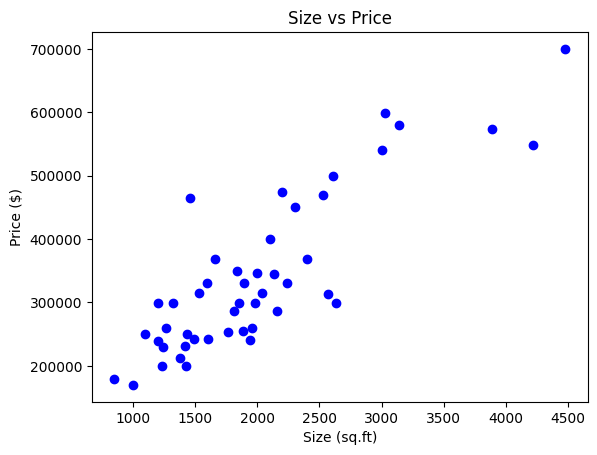


Fitted Model using Absolute Error:
Slope (Absolute Error): 161.9268921637616
Intercept (Absolute Error): 11.395707113209959


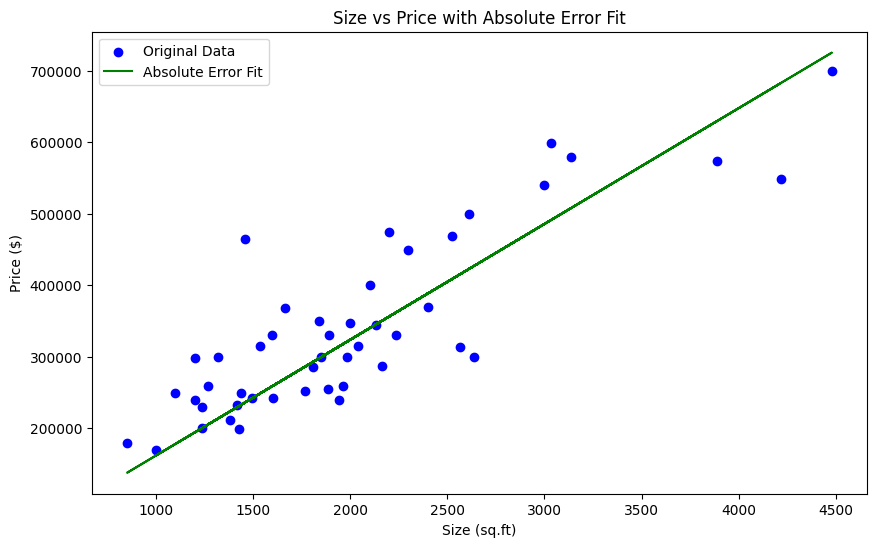


Exploring Multiple Solutions:
Initial guess [0, 0] -> Slope: 161.9268921637616, Intercept: 11.395707113209959
Initial guess [50, 10000] -> Slope: 147.1283530771391, Intercept: 38476.556628149534
Initial guess [200, -100000] -> Slope: 215.8528282590035, Intercept: -99859.43793946061


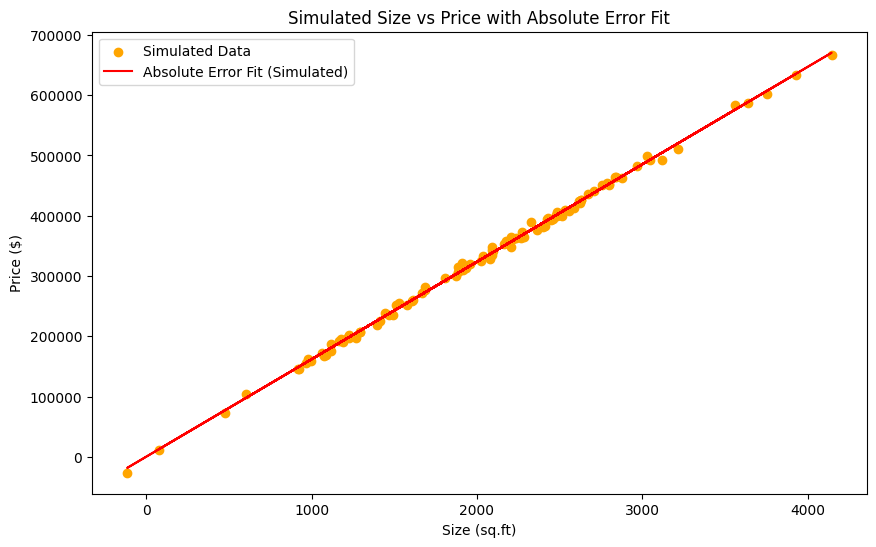


Correlation Analysis:
Correlation (Original Data):
           Size     Price
Size   1.000000  0.854988
Price  0.854988  1.000000

Correlation (Simulated Data):
           Size     Price
Size   1.000000  0.999198
Price  0.999198  1.000000

Absolute Error Comparison:
Mean Absolute Error (Original Data): 53881.59623724493
Mean Absolute Error (Simulated Data): 4287.243375032271


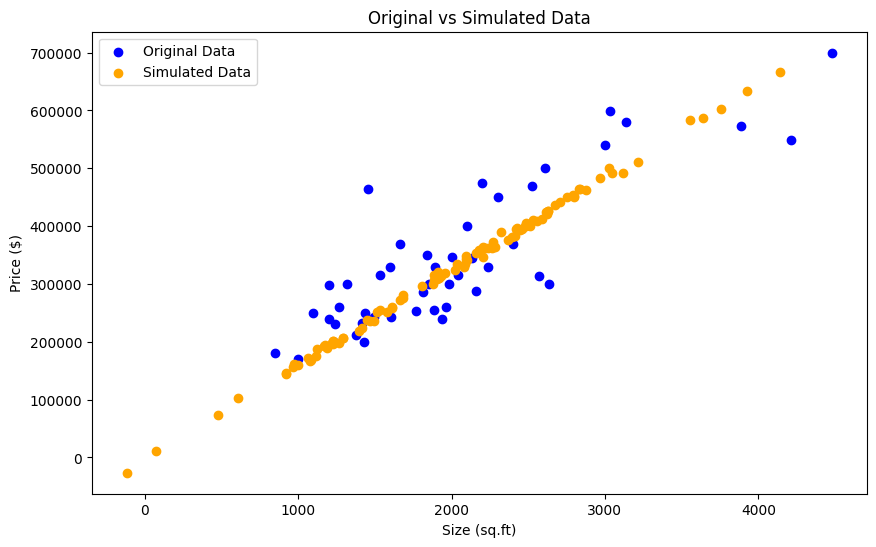


Least Squares Model:
Slope (Least Squares): 134.52528772024127
Intercept (Least Squares): 71270.49244872907


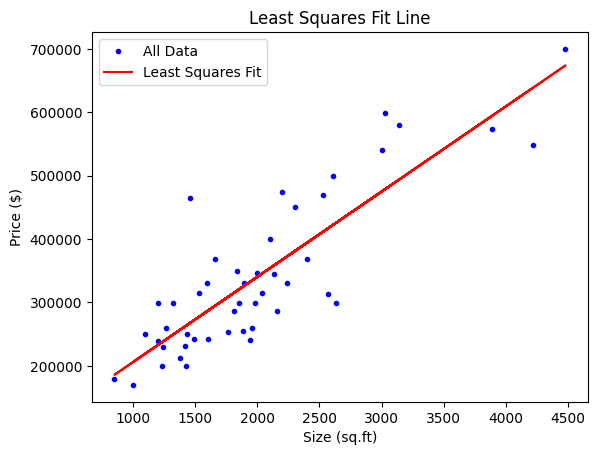


Polynomial Coefficients for Degree 11: [ 4.37094559e-29 -1.24531601e-24  1.57316132e-20 -1.16118402e-16
  5.55497555e-13 -1.80540683e-09  4.06116486e-06 -6.31334299e-03
  6.63847168e+00 -4.49226161e+03  1.75989701e+06 -3.02224425e+08]


In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: Print the current working directory
cwd = os.getcwd()
print(f"Current Working Directory: {cwd}")

# Step 2: List and display contents of the directory and sample data
!ls -lh /content/*
!cat /content/sample_data/README.md

# Step 3: Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# Step 4: Load the dataset from Google Drive
data_path = '/gdrive/MyDrive/6156F2024Shared/ex1data2.txt'
data = pd.read_csv(data_path, header=None)
data.columns = ['Size', 'Bedrooms', 'Price']  # Assign column names

# Display the first few rows of the dataset
print("\nDataset Preview:")
print(data.head())

# Step 5: Remove the 'Bedrooms' column for univariate linear regression
data_univariate = data[['Size', 'Price']]
print("\nData for Univariate Regression (Size vs Price):")
print(data_univariate.head())

# Step 6: Plot the original data
plt.scatter(data_univariate['Size'], data_univariate['Price'], color='blue')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.title('Size vs Price')
plt.show()

# Step 7: Define a function for absolute error loss
def absolute_error_loss(params, x, y):
    slope, intercept = params
    predictions = slope * x + intercept
    return np.sum(np.abs(predictions - y))

# Step 8: Fit the model using absolute error loss
initial_guess = [0, 0]  # Initial guess for slope and intercept
result = minimize(absolute_error_loss, initial_guess, args=(data_univariate['Size'], data_univariate['Price']))
slope_abs, intercept_abs = result.x

print(f"\nFitted Model using Absolute Error:")
print(f"Slope (Absolute Error): {slope_abs}")
print(f"Intercept (Absolute Error): {intercept_abs}")

# Step 9: Plot the original data and the fitted line using absolute error regression
plt.figure(figsize=(10, 6))
plt.scatter(data_univariate['Size'], data_univariate['Price'], color='blue', label='Original Data')
line_values = [slope_abs * v + intercept_abs for v in data_univariate['Size']]
plt.plot(data_univariate['Size'], line_values, 'g-', label='Absolute Error Fit')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.title('Size vs Price with Absolute Error Fit')
plt.legend()
plt.show()

# Step 10: Explore multiple solutions for fitting the model using different initial guesses
initial_guesses = [[0, 0], [50, 10000], [200, -100000]]

print("\nExploring Multiple Solutions:")
for guess in initial_guesses:
    result = minimize(absolute_error_loss, guess, args=(data_univariate['Size'], data_univariate['Price']))
    slope, intercept = result.x
    print(f"Initial guess {guess} -> Slope: {slope}, Intercept: {intercept}")

# Step 11: Simulate data that produces a similar effect
np.random.seed(39)
simulated_size = np.random.normal(data_univariate['Size'].mean(), data_univariate['Size'].std(), 100)
simulated_price = slope_abs * simulated_size + intercept_abs + np.random.normal(0, 5000, 100)  # Adding some noise

# Step 12: Fit the model using absolute error regression on simulated data
result_simulated = minimize(absolute_error_loss, initial_guess, args=(simulated_size, simulated_price))
slope_sim, intercept_sim = result_simulated.x

# Plot the simulated data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(simulated_size, simulated_price, color='orange', label='Simulated Data')
line_values_sim = [slope_sim * v + intercept_sim for v in simulated_size]
plt.plot(simulated_size, line_values_sim, 'r-', label='Absolute Error Fit (Simulated)')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.title('Simulated Size vs Price with Absolute Error Fit')
plt.legend()
plt.show()

# Step 13: Compare correlation and error of original and simulated data
print("\nCorrelation Analysis:")
print("Correlation (Original Data):")
print(data_univariate.corr())
print("\nCorrelation (Simulated Data):")
simulated_df = pd.DataFrame({'Size': simulated_size, 'Price': simulated_price})
print(simulated_df.corr())

# Step 14: Calculate absolute error for original and simulated data
def calculate_absolute_error(slope, intercept, x, y):
    predictions = slope * x + intercept
    absolute_errors = np.abs(predictions - y)
    return np.mean(absolute_errors)

print("\nAbsolute Error Comparison:")
original_data_error = calculate_absolute_error(slope_abs, intercept_abs, data_univariate['Size'], data_univariate['Price'])
simulated_data_error = calculate_absolute_error(slope_sim, intercept_sim, simulated_size, simulated_price)

print(f"Mean Absolute Error (Original Data): {original_data_error}")
print(f"Mean Absolute Error (Simulated Data): {simulated_data_error}")

# Step 15: Plot both original and simulated data for visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(data_univariate['Size'], data_univariate['Price'], color='blue', label='Original Data')
plt.scatter(simulated_size, simulated_price, color='orange', label='Simulated Data')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.title('Original vs Simulated Data')
plt.legend()
plt.show()

# Step 16: Fit the least squares model for comparison
slope_ls, intercept_ls = np.polyfit(data.Size, data.Price, 1)
print(f"\nLeast Squares Model:")
print(f"Slope (Least Squares): {slope_ls}")
print(f"Intercept (Least Squares): {intercept_ls}")

# Plot the least squares line over the actual values
line_values_ls = [slope_ls * v + intercept_ls for v in data.Size]
plt.plot(data.Size, data.Price, 'b.', label='All Data')
plt.plot(data.Size, line_values_ls, 'r-', label='Least Squares Fit')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.title('Least Squares Fit Line')
plt.legend()
plt.show()

# Step 17: Calculate polynomial coefficients for higher degree fitting (optional)
coefficients = np.polyfit(data.Size, data.Price, 11)
print(f"\nPolynomial Coefficients for Degree 11: {coefficients}")


In [1]:
# SOURCE of data and some comments:
# https://www.kaggle.com/kennethjohn/linear-regression-from-scratch/

# Modifications by WZ 2018-2024

# Input data files should be available in the proper directory.
# To see your current directory run

import os
cwd = os.getcwd()
print(cwd)


/content


In [2]:
!ls -lh /content/*
!cat /content/sample_data/README.md

total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root 295K Sep 30 13:24 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Sep 30 13:24 california_housing_train.csv
-rw-r--r-- 1 root root  18M Sep 30 13:24 mnist_test.csv
-rw-r--r-- 1 root root  35M Sep 30 13:24 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md
This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Ans

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


## Linear Regression: Univariate

Let's start with a very simple task of <i>linear regression</i> using a sample dataset called Portland Housing Prices, wherein we are given some <i>features</i> of a house (i.e. area, no. of rooms, etc) and predict the <i>target</i> price.</pre>

To make things much simpler. Let us use only one <i>feature</i> or in this case one variable, also known as
<b>univariate linear regression</b>. That is we are only gonna use the 'Area' of a given house to train a
linear model


In [6]:
#importing dependencies
import numpy as np  #python library for scientific computing
import pandas as pd #python library for data analysis and dataframes e.g. to import spreadsheets

In [7]:
#find your path

%ls /gdrive/MyDrive/6156F2024Shared/ex1data2.txt
%cat /gdrive/MyDrive/6156F2024Shared/ex1data2.txt | head -6
!echo " "
print("\n")
%cat /gdrive/MyDrive/6156F2024Shared/ex1data2.txt | tail -5



/gdrive/MyDrive/6156F2024Shared/ex1data2.txt
2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900
 


2567,4,314000
1200,3,299000
852,2,179900
1852,4,299900
1203,3,239500


In [8]:
data = pd.read_csv('/gdrive/MyDrive/6156F2024Shared/ex1data2.txt', header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv('/gdrive/MyDrive/6156F2024Shared/ex1data2.txt', header=None)

data.columns = ['Size', 'Bedrooms', 'Price']

data.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
data_univariate = data[['Size', 'Price']]

print(data_univariate.head())

   Size   Price
0  2104  399900
1  1600  329900
2  2400  369000
3  1416  232000
4  3000  539900


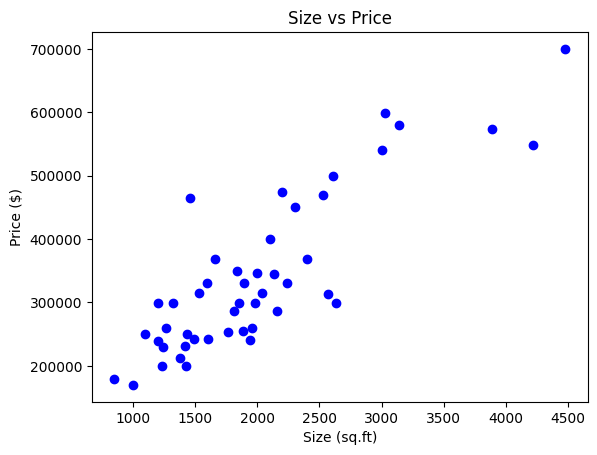

In [11]:
import matplotlib.pyplot as plt

plt.scatter(data_univariate['Size'], data_univariate['Price'], color='blue')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.title('Size vs Price')
plt.show()

<pre>The data itself does not contain feature names or labels, let's set that up first.</pre>
<pre>According to the source the first column is the <b>size</b> of the house in sq.ft. followed by
the no. of <b>bedrooms</b> and lastly the <b>price</b>.</pre>

In [ ]:
data.columns =(['Size','Bedroom','Price'])
data.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


We will make a copy of our data, and first work only with a sample

In [ ]:
data2=data.copy()
data2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<pre>Let us remove the 'Bedroom' feature since we are doing <b>univariate linear regression</b></pre>

> Add blockquote



In [ ]:
data2.drop('Bedroom', axis=1, inplace=True)
#note axis=1 is the column (think of 1 as a vertical line)

In [ ]:
data2 = data2.sample(frac=0.5)
data2.head()

,Size,Price
30,1839,349900
16,1320,299900
0,2104,399900
12,1890,329999
21,1888,255000


In [ ]:
# necessary dependencies for plotting
import matplotlib.pyplot as plt #python library for plot and graphs
%matplotlib inline

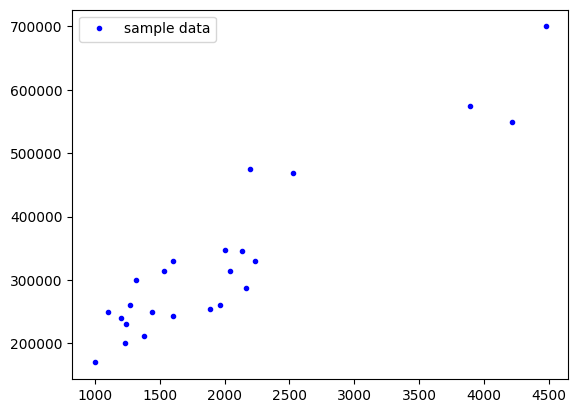

In [ ]:
plt.plot(data2.Size, data2.Price, 'b.',label='sample data')
plt.legend(loc='best')
plt.show()

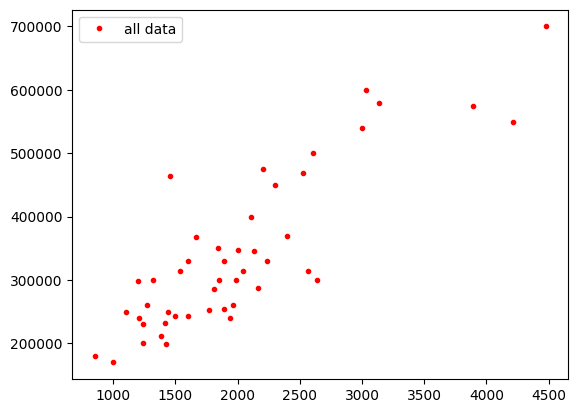

In [ ]:
plt.plot(data.Size, data.Price, 'r.', label="all data")
plt.legend(loc='best')
plt.show()


<pre>Let's <b>plot</b> our data and draw some <b>insights</b> of how a <b>linear model</b> could fit.</pre>

From the plot results we could see that there is a <b>high correlation</b> between Housing <b>Area</b>
and Housing <b>Price</b> (obviously) and therefore we could use a <b>line</b> (linear model) to fit this data

In [ ]:
data2.corr()

,Size,Price
Size,1.000000,0.928963
Price,0.928963,1.000000


In [ ]:
# a way to find all the correlations
data.corr()

,Size,Bedroom,Price
Size,1.000000,0.559967,0.854988
Bedroom,0.559967,1.000000,0.442261
Price,0.854988,0.442261,1.000000


## Linear Model

The idea of linear regression is to fit a line to a set of points.
So let's use the line function given by:
$$f(x) = y = \beta \, x + \alpha $$
where $\beta$ is the slope and $\alpha$ is the <b>y</b> intercept,

or for a more general form (multiple variables)

$$h(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$



### Computing simple linear regression

We need to find the estimates of the coefficients of the line. The hats are used for estimates, the bars for averages (means). The formulas (which we do not derive here) are:


$$\hat {\alpha }= \bar {y}-{\hat {\beta }} \, \bar {x}$$







   $$ \hat{\beta}=
   \frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})  
   (y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}} =
  \frac { Cov \,(x,y)}{Var \,(x)} \\ $$
  
  That is we need to find the values of the covariance $Cov(x,y)$ and the variance of $x$.
  
  The good news is these are predefined functions.
  
  
  

In [ ]:
data2.cov()

,Size,Price
Size,9.081709e+05,1.165868e+08
Price,1.165868e+08,1.734341e+10


For an explanation what you see above look it up:
https://en.wikipedia.org/wiki/Covariance_matrix

In [ ]:
data2.var()

,0
Size,9.081709e+05
Price,1.734341e+10


In [ ]:
data2.var().Size

908170.8695652174

This is how we find a particular value in a data frame:

In [ ]:
data2.cov().iloc[1][0]

<ipython-input-26-d99dfc708bb5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data2.cov().iloc[1][0]


116586821.73913041

In [ ]:
beta_hat=(data2.cov().iloc[1][0]/data2.var().Size)

<ipython-input-27-001a0cde3789>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_hat=(data2.cov().iloc[1][0]/data2.var().Size)


In [ ]:
"""Computing the means"""
x_bar = data2.Size.mean()
y_bar= data2.Price.mean()
print(x_bar,' ' ,y_bar)

1985.5   329333.3333333333


In [ ]:
alpha_hat= y_bar-beta_hat*x_bar

alpha_hat

74443.9261517697

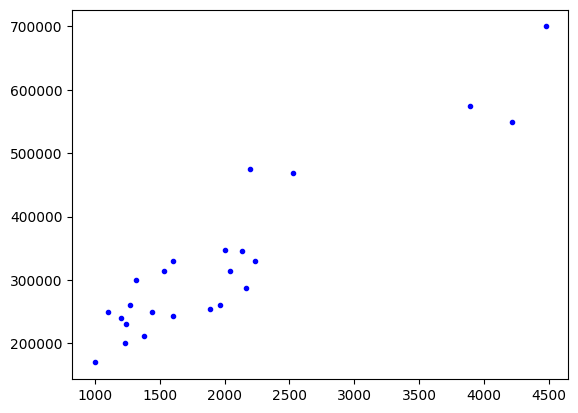

In [ ]:
plt.plot(data2.Size, data2.Price, 'b.')


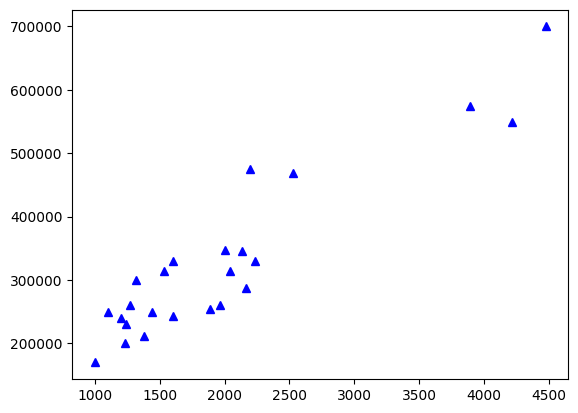

In [ ]:
plt.plot(data2.Size, data2.Price, 'b^')
plt.show()

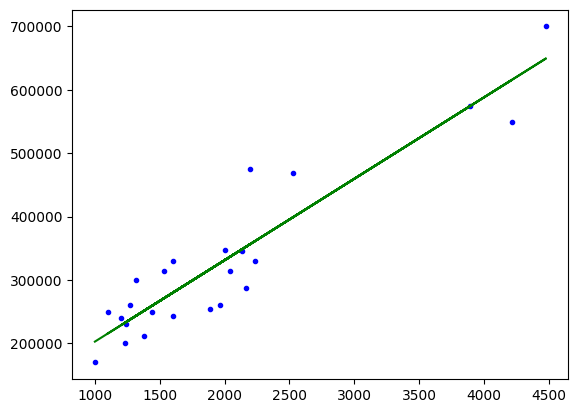

In [ ]:
plt.plot(data2.Size, data2.Price, 'b.')
slope=beta_hat
intercept=alpha_hat
line_values = [slope * v + intercept for v in data2.Size]
plt.plot(data2.Size, line_values, 'g-')
plt.show()

## Another way of fitting the line to the data

134.52528772024127 71270.49244872907


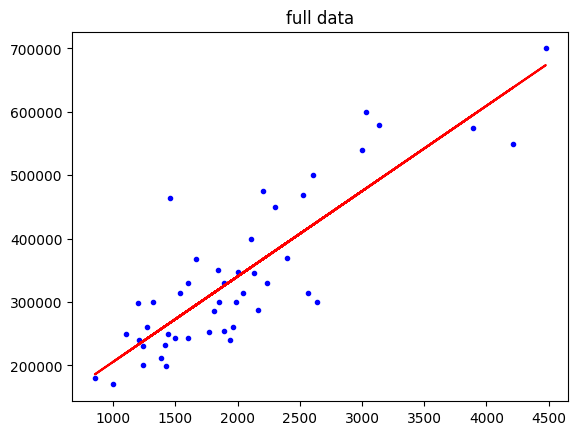

In [ ]:
# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(data.Size, data.Price, 1)
print(slope, intercept)


# Create a list of values in the best fit line
line_values = [slope * v + intercept for v in data.Size]
#print(line_values)

# Plot the best fit line over the actual values
plt.plot(data.Size, data.Price, 'b.')
#plt.show()
plt.plot(data.Size, line_values, 'r')
plt.title("full data")
plt.show()

In [ ]:
np.polyfit(data.Size, data.Price, 11)

array([ 4.37094559e-29, -1.24531601e-24,  1.57316132e-20, -1.16118402e-16,
        5.55497555e-13, -1.80540683e-09,  4.06116486e-06, -6.31334299e-03,
        6.63847168e+00, -4.49226161e+03,  1.75989701e+06, -3.02224425e+08])

**Question:** Why are we getting such a big array?

Your answer:

## Next Steps ##

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion




**Puzzle:**  How is it possible to have no errors? https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard

